In [1]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dblib import mssql
from plotlib.mplfuncs import FigWidthsInch as Size
%matplotlib inline


W = Size.single_col.value
H = W

sns.set()

#grey = ["#FFFFFF", "#999999", "#666666", "#333333", "#000000"]
grey = ["#FFFFFF", "#AAAAAA"]

sns.set(font="Times New Roman", font_scale=1.2, rc={"lines.linewidth": 0.5, "figure.figsize":(W,H)})

sns.set_palette(sns.color_palette("colorblind"))
sns.set_style('ticks', rc={'axes.grid':True})
print('DONE')

DONE


In [2]:
#mv_graph_length_simple.sql
sql="select distinct 'Manual' as Measure ,tl_mm as [Actual (mm)] ,persp_corr_iter_profile_tridist_mm as [Estimate (mm)] from v_mv_detections where transform = 'None' union select distinct 'MV (nas)' as Measure ,tl_mm as [Actual (mm)] ,nas_persp_corr_iter_profile_tridist_mm as [Estimate (mm)] from v_mv_detections where transform = 'None'"
with mssql.Conn('imagedb', '(local)') as cnn:
    df = pd.read_sql(sql, cnn)
list(df)

['Measure', 'Actual (mm)', 'Estimate (mm)']

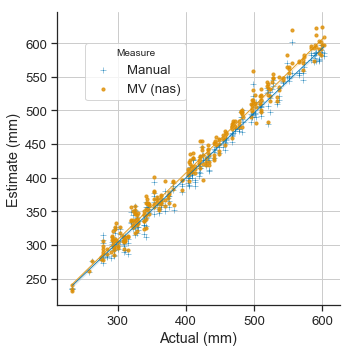

In [3]:
g = sns.lmplot(x="Actual (mm)", y="Estimate (mm)", hue="Measure",
               truncate=True, x_ci="ci",
               data=df, markers=["+","."], scatter_kws={"s": 40}, legend=None)

plt.legend(loc=(0.1,0.7), title='Measure')

plt.savefig('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images/mv_graph_length_simple.jpg', dpi=1200)
plt.savefig('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images/mv_graph_length_simple.svg')

In [59]:
sql="select distinct 'Manual' as Measure ,tl_mm as [Actual (mm)] ,persp_corr_iter_profile_tridist_mm - tl_mm as [Error (mm)] from v_mv_detections where transform = 'None' union select distinct 'MV (nas)' as Measure ,tl_mm as [TL (mm)] ,nas_persp_corr_iter_profile_tridist_mm - tl_mm as [Error (mm)] from v_mv_detections where transform = 'None'"
with mssql.Conn('imagedb', '(local)') as cnn:
    df = pd.read_sql(sql, cnn)

(3.149606299212598,)

In [88]:
grey = ["#EEEEEE", "#E8E8E8", "#E3E3E3", "#DEDEDE", "#D9D9D9", "#D3D3D3", "#CECECE", "#C9C9C9", "#C4C4C4", "#BFBFBF"]
grey = ["#E8E8E8", "#000000"]
sns.set()
sns.set(font='Times New Roman', font_scale=0.8, style="ticks")
sns.set_palette(sns.color_palette("colorblind"))
PLOT_KWARGS = {'aa':True, 'linestyle':'dashed', 'c':'0.65', 'lw':1}
PLOT_REG_KWARGS = {'aa':True, 'linestyle':'solid', 'lw':1}
SCATTER_KWARGS = {'marker':'.', 's':4}
SPACER_FACTOR = 18

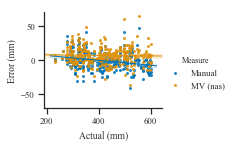

In [89]:
g = sns.lmplot(x='Actual (mm)', y='Error (mm)', hue='Measure', data=df,
                   ci=95, x_ci='ci', n_boot=1000, height=2.14, aspect=1.2, line_kws=PLOT_REG_KWARGS, scatter_kws=SCATTER_KWARGS)

ylim = (-70, 70); xlim = (0, 600)
#g.set(xlim=xlim, ylim=ylim)
g.set(ylim=ylim)
        
#g.set_axis_labels('tl (mm)', 'Error (mm)')
